# **Importing the dependencies**


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



# **Data Collection & Processing**

In [64]:
DBset_path='diabetes.csv'
DiabetesDBset=pd.read_csv(DBset_path)

In [4]:
print(DiabetesDBset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

**Number of rows and columns**

In [5]:
DiabetesDBset.shape


(768, 9)

**Printing the first five rows of DBset**

In [6]:
DiabetesDBset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Display the different datatypes available**

In [7]:
DiabetesDBset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Checking if any null value is present**

In [8]:
DiabetesDBset.isnull().values.any()

False

**Checking if any duplicated value is present**

In [9]:
DiabetesDBset.duplicated().values.any()

False

**Checking if any 0 value is present**

In [10]:
zeroList = [];

for i in (DiabetesDBset.columns):
    zeroExist = False;
    for x in (DiabetesDBset[i].unique()):
        if x == 0 :
            if len(zeroList) != 0:
              counter = 0;
              for z in (zeroList):
                if z == i:
                  counter+=1;
              if counter == 0:
                zeroList.append(i);
                zeroExist = True;                                
            else:
              zeroList.append(i);
              zeroExist = True;
        if zeroExist == True:
          break;
    if zeroExist == False:
      print(i+" column has not 0 vale");          
if len(zeroList) != 0 :
     for i in (zeroList):
       print(i + " column has 0 value");        
else :
     print("There are no columns with 0 value");
 

DiabetesPedigreeFunction column has not 0 vale
Age column has not 0 vale
Pregnancies column has 0 value
Glucose column has 0 value
BloodPressure column has 0 value
SkinThickness column has 0 value
Insulin column has 0 value
BMI column has 0 value
Outcome column has 0 value


**Replace 0 value with mean**

In [11]:
DiabetesDBset["Glucose"]=DiabetesDBset["Glucose"].replace(0, DiabetesDBset["Glucose"].mean())
DiabetesDBset["BloodPressure"]=DiabetesDBset["BloodPressure"].replace(0, DiabetesDBset["BloodPressure"].mean())
DiabetesDBset["SkinThickness"]=DiabetesDBset["SkinThickness"].replace(0, DiabetesDBset["SkinThickness"].mean())
DiabetesDBset["Insulin"]=DiabetesDBset["Insulin"].replace(0, DiabetesDBset["Insulin"].mean())
DiabetesDBset["BMI"]=DiabetesDBset["BMI"].replace(0, DiabetesDBset["BMI"].mean())

**Check 0 values after replacement**

In [12]:
zeroList = [];

for i in (DiabetesDBset.columns):
    zeroExist = False;
    for x in (DiabetesDBset[i].unique()):
        if x == 0 :
            if len(zeroList) != 0:
              counter = 0;
              for z in (zeroList):
                if z == i:
                  counter+=1;
              if counter == 0:
                zeroList.append(i);
                zeroExist = True;                                
            else:
              zeroList.append(i);
              zeroExist = True;
        if zeroExist == True:
          break;
    if zeroExist == False:
      print(i+" column has not 0 vale");          
if len(zeroList) != 0 :
     for i in (zeroList):
       print(i + " column has 0 value");        
else :
     print("There are no columns with 0 value");
 

Glucose column has not 0 vale
BloodPressure column has not 0 vale
SkinThickness column has not 0 vale
Insulin column has not 0 vale
BMI column has not 0 vale
DiabetesPedigreeFunction column has not 0 vale
Age column has not 0 vale
Pregnancies column has 0 value
Outcome column has 0 value


**Statistical measures of the data**

In [13]:
DiabetesDBset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
DiabetesDBset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
DiabetesDBset["Outcome"].replace(1, "Diabetic", inplace=True)
DiabetesDBset["Outcome"].replace(0, "Non Diabetic", inplace=True)

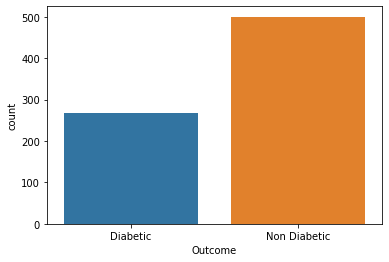

In [16]:
#number of each Outcome (diabetic-1 and non-diabetic-0)
sns.countplot(x = 'Outcome',data = DiabetesDBset)

In [18]:
DiabetesDBset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


**Heatmap - correlation**

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231

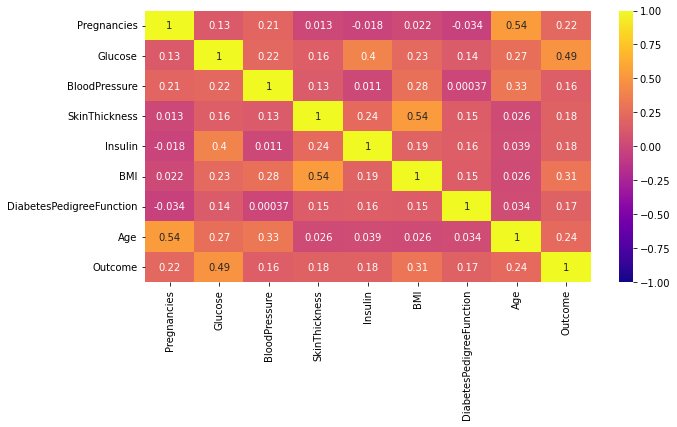

In [19]:
correlation=DiabetesDBset.corr()
print(correlation)
plt.figure(figsize=(10,5))
sns.heatmap(correlation,xticklabels=correlation.columns,annot=True, cmap="plasma", vmax=1, vmin=-1)

**Histograms for each feature**

<function matplotlib.pyplot.show(*args, **kw)>

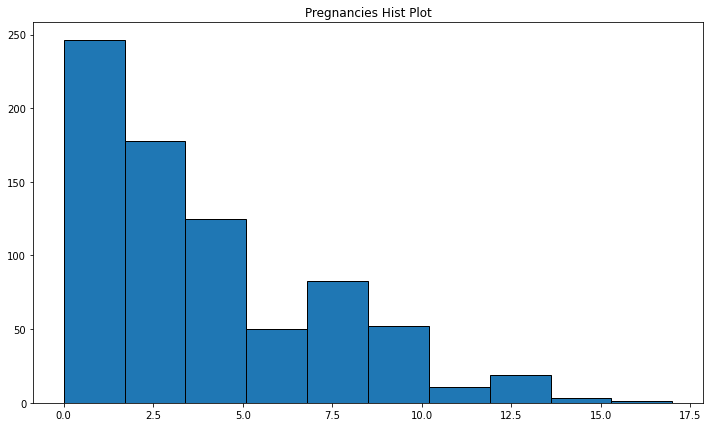

In [20]:
plt.figure(figsize=(12,7))
plt.hist("Pregnancies",data=DiabetesDBset,edgecolor="k")
plt.title("Pregnancies Hist Plot")
plt.show

Text(0.5, 1.0, 'Number of pregnancies in Diabetic  ')

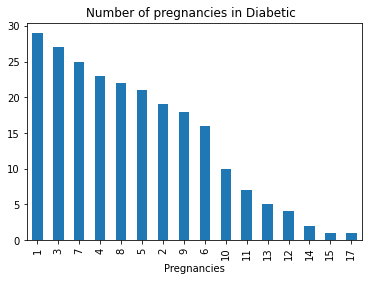

In [23]:
#the relation between diabetic patient and number of pregnancies 
Pregnancies= DiabetesDBset[(DiabetesDBset["Pregnancies"]>0) & (DiabetesDBset["Outcome"]=="Diabetic")] 
Pregnancies.groupby("Pregnancies").count().sort_values(by="Outcome", ascending=False)["Outcome"].plot(kind="bar")
plt.title("Number of pregnancies in Diabetic  ")


In [ ]:
#percentage of pregnant and diabetic out of all sample
p_percent = len(Pregnancies)/len(DiabetesDBset) *100
print ("percentage of diabetic patient who are pregnant   : \n " + str(p_percent) )

percentage of diabetic patient who are pregnant   : 
 29.947916666666668


<function matplotlib.pyplot.show(*args, **kw)>

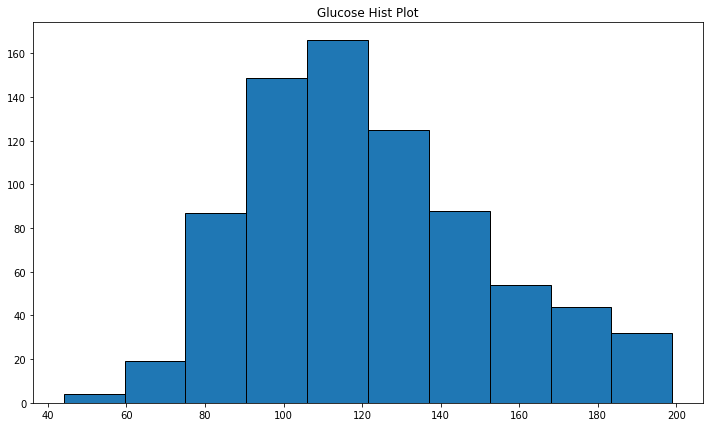

In [24]:
plt.figure(figsize=(12,7))
plt.hist("Glucose",data=DiabetesDBset,edgecolor="k")
plt.title("Glucose Hist Plot")
plt.show

In [25]:
#lets check Pregnancies effect on diabetic people
df1=DiabetesDBset[(DiabetesDBset["Glucose"]>=140) & (DiabetesDBset["Outcome"]=="Diabetic")]
g_percent =len(df1)/len(DiabetesDBset[DiabetesDBset["Outcome"]=="Diabetic"])*100
print ("percentage of diabetic patient who have glucose level above 100  : \n " + str(g_percent) )

percentage of diabetic patient who have glucose level above 100  : 
 50.373134328358205


In [26]:
df2=DiabetesDBset[(DiabetesDBset["Glucose"]>=140) & (DiabetesDBset["Outcome"]=="Diabetic")]
print(df2["Glucose"].count())

135


Text(0.5, 1.0, 'diabetic & Non_Diabetic ')

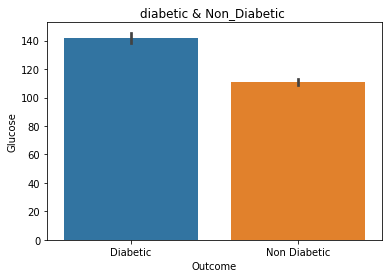

In [28]:
sns.barplot(x=DiabetesDBset["Outcome"],y=DiabetesDBset["Glucose"])
plt.title("diabetic & Non_Diabetic ")

<function matplotlib.pyplot.show(*args, **kw)>

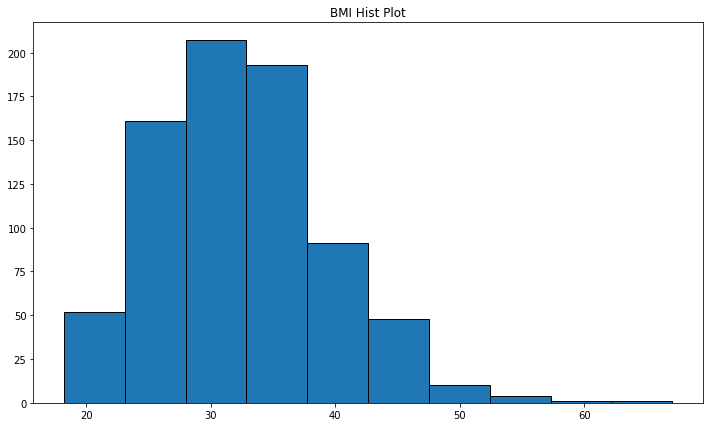

In [29]:
plt.figure(figsize=(12,7))
plt.hist("BMI",data=DiabetesDBset,edgecolor="k")
plt.title("BMI Hist Plot")
plt.show

In [30]:
len(DiabetesDBset[(DiabetesDBset["BMI"]>=25) & (DiabetesDBset["Outcome"]=="Diabetic")])/len(DiabetesDBset[DiabetesDBset["Outcome"]=="Diabetic"])* 100

97.38805970149254

<function matplotlib.pyplot.show(*args, **kw)>

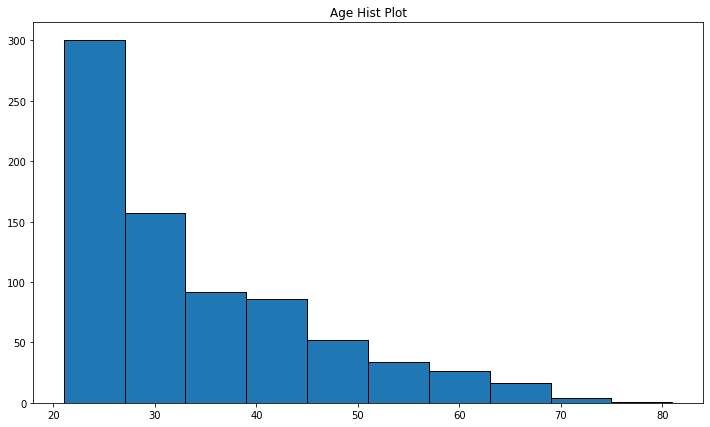

In [31]:
plt.figure(figsize=(12,7))
plt.hist("Age",data=DiabetesDBset,edgecolor="k")
plt.title("Age Hist Plot")
plt.show

Text(0.5, 1.0, 'Effect of age in diabetic and non_diabetic ')

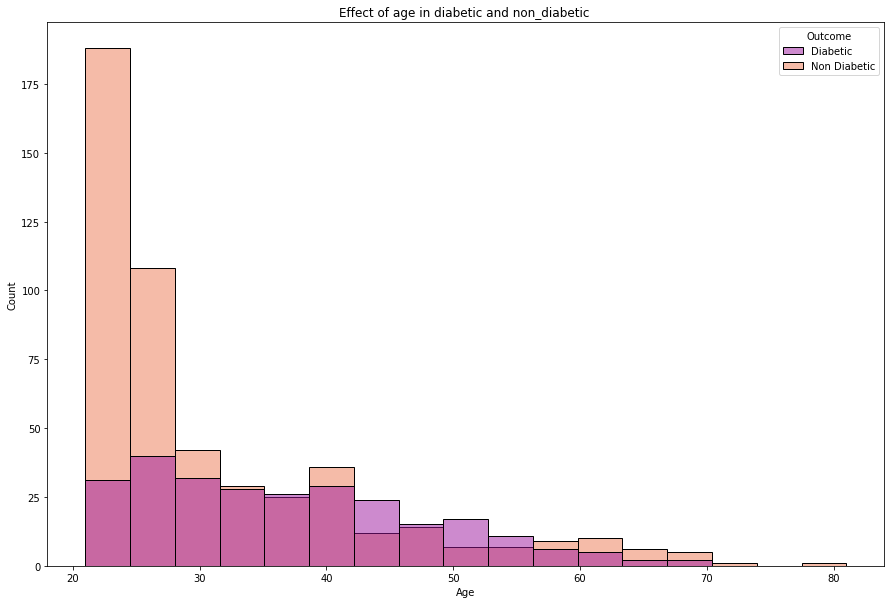

In [32]:
# age
plt.figure(figsize=(15,10))
sns.histplot(x="Age", data= DiabetesDBset, hue="Outcome",palette="plasma")
plt.title("Effect of age in diabetic and non_diabetic ")

**Separating the data and labels**

In [72]:
DiabetesDBset["Outcome"].replace("Diabetic",1, inplace=True)
DiabetesDBset["Outcome"].replace("Non Diabetic",0, inplace=True)

In [73]:
X=DiabetesDBset.drop(columns='Outcome',axis=1)
Y=DiabetesDBset['Outcome']

In [74]:
#Printing X and Y table

print("Data table:")
print(X)
print("Outcome table:")
print(Y)

Data table:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0

**Data standardization**

In [75]:
Scaler=StandardScaler()

In [76]:
Scaler.fit(X)


StandardScaler()

In [77]:
Standardized_data=Scaler.transform(X)

In [78]:
print(Standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [79]:
X=Standardized_data
Y=DiabetesDBset['Outcome']

**Train test split**

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

About X, X_train and X_test => number of rows and columns


In [81]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the ML model

# **Support vector machine**

In [82]:
classifier = svm.SVC(kernel='linear')

In [83]:
#support vectom machine classifier

classifier.fit(X_train,Y_train)

SVC(kernel='linear')

**Accuracy Score**

In [84]:
#Accuracy check - training set

X_train_prediction = classifier.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data = ', X_train_accuracy)

Accuracy on training data =  0.7866449511400652


In [85]:
#Accuracy check - testing set

X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data = ', X_test_accuracy)

Accuracy on test data =  0.7727272727272727


In [86]:
print(X_test_prediction)

[0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0]


In [87]:
#Accuracy check - testing set

X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data = ', X_test_accuracy)

Accuracy on test data =  0.7727272727272727


**Confusion Matrix, Precision, Recall & F1-score**

Confusion matrix : 
 [[91  9]
 [26 28]]

 Outcome values : 
 28 26 9 91


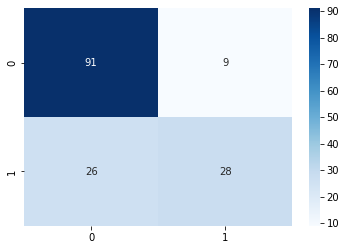


 Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.52      0.62        54
           0       0.78      0.91      0.84       100

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [88]:
# actual values
actual = Y_test
# predicted values
predicted = X_test_prediction

# confusion matrix
matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('\n Outcome values : \n', tp, fn, fp, tn)

ax = sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('\n Classification report : \n',matrix)

**Building a Predictive System**

In [89]:
#input data instance
input_data = (6,148,72,35,0,33.6,0.627,50)

#check test
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
standardize_input_Data = Scaler.transform(input_data_reshaped)


prediction = classifier.predict(standardize_input_Data)
if(prediction==[0]):
    print("Person is non-diabetic")
else:
    print("Person is diabetic")

Person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# **Logistic Regression**

In [90]:
model = LogisticRegression()


In [91]:
# training the Logistic Regression model using Training data

model.fit(X_train, Y_train)

LogisticRegression()

**Accuracy Score**

In [92]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.7850162866449512


In [93]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.7597402597402597


**Confusion Matrix, Precision, Recall & F1-score**

Confusion matrix : 
 [[89 11]
 [26 28]]

 Outcome values : 
 28 26 11 89


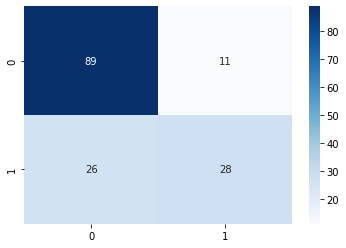


 Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.52      0.60        54
           0       0.77      0.89      0.83       100

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [94]:
# actual values
actual = Y_test
# predicted values
predicted = X_test_prediction

# confusion matrix
matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('\n Outcome values : \n', tp, fn, fp, tn)

ax = sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('\n Classification report : \n',matrix)

**Building a Predictive System**

In [95]:
#input data instance
input_data = (6,148,72,35,0,33.6,0.627,50)

#check test
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
standardize_input_Data = Scaler.transform(input_data_reshaped)


prediction = classifier.predict(standardize_input_Data)
if(prediction==[0]):
    print("Person is non-diabetic")
else:
    print("Person is diabetic")

Person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# **K-nearest Neighbors Classifier**


In [96]:
knn_clf=KNeighborsClassifier(n_neighbors=15)

In [97]:
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [98]:
#Accuracy check - training set

knn_predictions=knn_clf.predict(X_train)
print('Accuracy of the knn algorithm is : {}'.format (accuracy_score(Y_train, knn_predictions)))

Accuracy of the knn algorithm is : 0.7931596091205212


In [99]:
#Accuracy check - testing set

knn_test_prediction = knn_clf.predict(X_test)
print('Accuracy of the knn algorithm is : {}'.format (accuracy_score(Y_test, knn_test_prediction)))

Accuracy of the knn algorithm is : 0.7207792207792207


**Confusion Matrix, Precision, Recall & F1-score**

Confusion matrix : 
 [[89 11]
 [32 22]]

 Outcome values : 
 22 32 11 89


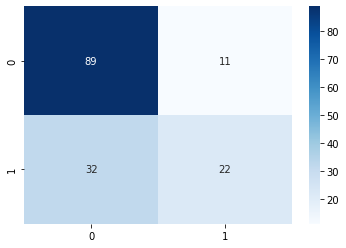


 Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.41      0.51        54
           0       0.74      0.89      0.81       100

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [100]:
# actual values
actual1 = Y_test
# predicted values
predicted1 = knn_test_prediction

# confusion matrix
matrix1 = confusion_matrix(actual1,predicted1)
print('Confusion matrix : \n',matrix1)

# outcome values order in sklearn
tp1, fn1, fp1, tn1 = confusion_matrix(actual1,predicted1,labels=[1,0]).reshape(-1)
print('\n Outcome values : \n', tp1, fn1, fp1, tn1)

ax1 = sns.heatmap(matrix1, annot=True, cmap='Blues')
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix1 = classification_report(actual1,predicted1,labels=[1,0])
print('\n Classification report : \n',matrix1)

**Building a Predictive System**

In [101]:
#input data instance
input_data = (6,148,72,35,0,33.6,0.627,50)

#check test
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
standardize_input_Data = Scaler.transform(input_data_reshaped)


prediction = classifier.predict(standardize_input_Data)
if(prediction==[0]):
    print("Person is non-diabetic")
else:
    print("Person is diabetic")

Person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
